# Autoencoder (AE)

#### Input → Encoder → Latent Space → Decoder → Reconstruction

## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

## Encoder (Compression part)

In [5]:
latent_dim = 32

encoder_input = keras.Input(shape=(784,))
x = layers.Dense(256, activation='relu')(encoder_input)
x = layers.Dense(128, activation='relu')(x)

latent = layers.Dense(latent_dim, activation='relu')(x)

encoder = keras.Model(encoder_input, latent, name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 237,984 (929.62 KB)

 Trainable params: 237,984 (929.62 KB)

 Non-trainable params: 0 (0.00 B)

## Decoder (Reconstruction part)

In [7]:
decoder_input = keras.Input(shape=(latent_dim,))
x = layers.Dense(128, activation='relu')(decoder_input)
x = layers.Dense(256, activation='relu')(x)

decoder_output = layers.Dense(784, activation='sigmoid')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,736 (932.56 KB)

 Trainable params: 238,736 (932.56 KB)

 Non-trainable params: 0 (0.00 B)

## Autoencoder Model (complete)

In [8]:
autoencoder_input = keras.Input(shape=(784,))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)

autoencoder = keras.Model(autoencoder_input, decoded, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 32)                  │         237,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 784)                 │         238,736 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 476,720 (1.82 MB)

 Trainable params: 476,720 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

## Compile & Train

In [9]:
autoencoder.compile(
    optimizer='adam',
    loss='mse'
)

autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, x_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0422 - val_loss: 0.0210
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0183 - val_loss: 0.0155
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0145 - val_loss: 0.0131
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0125 - val_loss: 0.0115
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


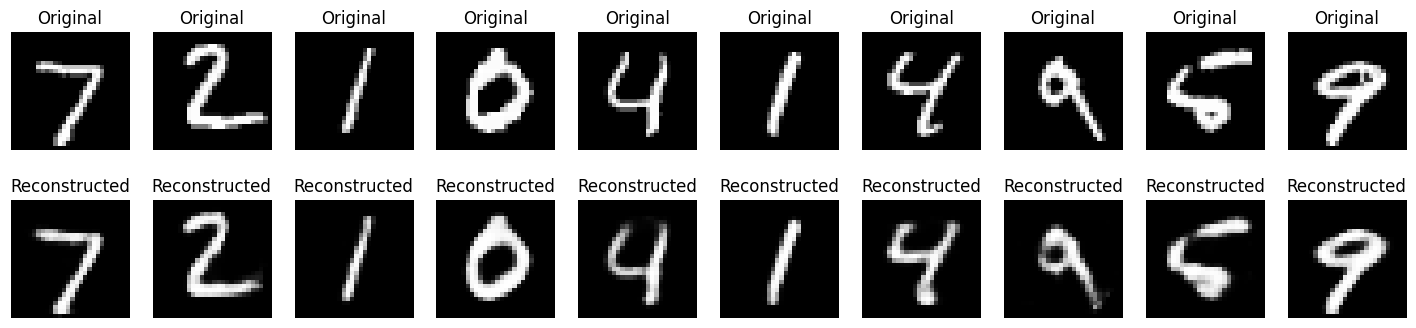

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(18, 4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()